In [39]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger

In [2]:
from data import load_data, load_train_and_test
from model import build_unet

In [3]:
(X_train, y_train), (X_test, y_test) = load_train_and_test()
print(f"Dataset: Train: {len(X_train)} - Test: {len(X_test)}")

Dataset: Train: 50000 - Test: 10000


In [10]:
model = build_unet((32,32, 1), 10)
# model.summary()

In [54]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [55]:
model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 133s 84ms/step - loss: 0.9324 - accuracy: 0.6751


In [36]:
X_train.shape, y_train.shape

((50000, 32, 32), (50000, 10))

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [49]:
pd.get_dummies(np.random.randint(0, 10, 3)).values

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 1.3480 - accuracy: 0.5359


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

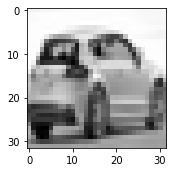

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_test[131], cmap="gray")
y_test[131]

In [30]:
result = model.predict(np.expand_dims(X_test[131], axis=0))

In [32]:
result.argmax()

1